In [1]:
%load_ext rpy2.ipython

In [2]:
import pandas as pd
import scipy.io as io
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.pylab as pylab
import numpy as np
from matplotlib import gridspec
import seaborn as sns
import datetime
from datetime import datetime, timedelta
import pickle
import itertools
import glob

In [3]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

In [4]:
import matplotlib.dates as dates
from scipy import stats
from scipy.stats import variation
from scipy.stats import skewnorm
import math
from scipy.signal import butter, filtfilt
import itertools

In [5]:
import matplotlib.pyplot as plt
#font = {'family': 'serif', 'serif': ['Palatino']}
font = {'family': 'serif', 'serif': ['Helvetica']}
plt.rc('font', **font)
plt.rc('text', usetex=False)

In [6]:
label_fontsize = 16
title_fontsize = 16

In [7]:
#Set up parameters for figure display
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'axes.labelweight': 'bold',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

pylab.rcParams.update(params)
pylab.rcParams["font.family"] = "serif"
pylab.rcParams["font.weight"] = "heavy"
#pylab.rcParams.update({'figure.autolayout': True})

In [8]:
sns.set(font_scale=1.25, style="whitegrid")

In [9]:
base_dir = '/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/'
output_dir = 'decArsousalDecisionmaking_JNeuroscience2021/Figures/'

In [10]:
nullfmt = NullFormatter()
np.random.seed(1234)
Nsteps = 250
t = np.arange(Nsteps)
mu = 0.002
sigma = 0.01

# the steps and position
S = mu + sigma*np.random.randn(Nsteps)
X = S.cumsum()

# the 1 sigma upper and lower analytic population bounds
lower_bound = mu*t - sigma*np.sqrt(t)
upper_bound = mu*t + sigma*np.sqrt(t)
lower_bound = lower_bound*0.1
upper_bound = upper_bound*0.1
negX = -X

In [11]:
def create_spaces():
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02

    rect_drift = [left, bottom, width+0.6, height]
    rect_histupper = [left, bottom+0.65, width+0.6, 0.3]
    rect_histlower = [left, bottom-0.3, width+0.6, 0.3]
    return rect_drift,rect_histupper,rect_histlower

In [12]:
def format_axes(axDrift, axHistupper, axHistlower):
    axHistupper.xaxis.set_major_formatter(nullfmt)
    axHistupper.yaxis.set_major_formatter(nullfmt)
    axHistlower.yaxis.set_major_formatter(nullfmt)
    axHistlower.xaxis.set_major_formatter(nullfmt)

    axDrift.xaxis.set_major_formatter(nullfmt)
    axDrift.yaxis.set_major_formatter(nullfmt)

    axDrift.xaxis.grid(False)
    axDrift.yaxis.grid(False)
    axDrift.set_ylabel('Bias')
    axDrift.tick_params( axis='x',which='both',bottom=False, top=False, labelbottom=False)
    
    for item in ([axDrift.title, axDrift.xaxis.label, axDrift.yaxis.label] +
             axDrift.get_xticklabels() + axDrift.get_yticklabels()):
        item.set_fontsize(20)

    axHistupper.set_xticks([]) 
    axHistupper.set_yticks([]) 
    axHistlower.set_xticks([]) 
    axHistlower.set_yticks([])

In [13]:
def format_driftaxes(axDrift, x_upper, x_lower):
    axDrift.set_ylim([min(x_upper),-min(x_upper)])
    axDrift.set_xlim([-100,500])

    axDrift.plot((0, 0), (-1.2, 1.2), 'k--')

    axDrift.set_yticks([min(x_upper), 0, -min(x_upper)])
    y_ticks=axDrift.get_yticks().tolist()
    y_ticks[0] = '0'
    y_ticks[1] ='z*a'
    y_ticks[2] = 'a'
    axDrift.tick_params(axis=u'both', which=u'both',length=0)
    axDrift.set_yticklabels(y_ticks)

In [14]:
def create_histdata(stringval):
    if stringval == 'basic':
        a = 5
        r = skewnorm.rvs(a, size=10000)
    elif stringval == 'bias_shifted':
        a = 5
        loc = -0.5
        scale = 0.5
        r = skewnorm(a,loc,scale).rvs(10000)
    return r,a

In [15]:
def add_annotation(axDrift,axHistupper,axHistlower):
    ann = axDrift.annotate("Time",xy=(-100, 0), xycoords='data',xytext=(400, 0), textcoords='data',
                           size=20, va="center", ha="center",
                           arrowprops=dict(arrowstyle="<|-",color="0.25",fc="w"))
    
    axHistupper.annotate('Left RT density', xy=(1.5, 0.5), xytext=(1.5, 0.5))
    axHistlower.annotate('Right RT density', xy=(1.5, 0.5), xytext=(1.5, 0.5))

    ann = axDrift.annotate("",xy=(0, 0), xycoords='data',xytext=(125, 0.55), textcoords='data',
                  va="center", ha="center",
                  arrowprops=dict(arrowstyle='<|-',connectionstyle="arc3,rad=-0.0",color="0.15",fc="w"))
    
    axDrift.annotate('< -- t -- >', xy=(0, 0), xytext=(-95, 0.05))
    axDrift.text(40.40, 0.14, "v(drift)", rotation=35, ha='center', va='bottom', color='black')

In [16]:
fig_dir = base_dir + output_dir
fig_dir

'/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/decArsousalDecisionmaking_JNeuroscience2021/Figures/'

# Basic drift diffusion diagram

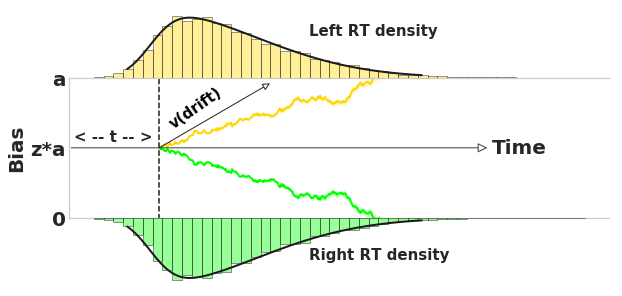

In [17]:
fig = plt.figure(1, figsize=(6, 3))

(rect_drift,rect_histupper,rect_histlower) = create_spaces()

axDrift = plt.axes(rect_drift)
axHistupper = plt.axes(rect_histupper)
axHistlower = plt.axes(rect_histlower)


axDrift.plot(t, X, lw=2, color='gold')
axDrift.plot(t, negX, lw=2,color='lime')


x_lower = X - lower_bound 
x_upper = X + lower_bound 

axDrift.fill_between(t, x_lower, x_upper, facecolor='gold', alpha=0.25)

x_lower = negX - lower_bound 
x_upper = negX + lower_bound 

axDrift.fill_between(t, x_lower, x_upper, facecolor='lime', alpha=0.25)


#format axes..
format_axes(axDrift = axDrift, axHistupper = axHistupper, axHistlower = axHistlower)  
format_driftaxes(axDrift = axDrift, x_upper = x_upper, x_lower = x_lower)
    

(r,a) =  create_histdata('basic')
x = r
x_plt = np.linspace(skewnorm.ppf(0.01, a),skewnorm.ppf(0.99, a), 100)
rv = skewnorm(a)


# For upper histogram..
n, bins, patches = axHistupper.hist(x, 50, density=1, histtype='bar',ec='black')
pylab.setp(patches, 'facecolor', 'gold', 'alpha', 0.4)
# add a line showing the expected distribution
axHistupper.plot(x_plt,rv.pdf(x_plt), 'k', linewidth=2)


# For lower histogram..
n, bins, patches = axHistlower.hist(x, 50, density=1, histtype='bar',ec='black')
pylab.setp(patches, 'facecolor', 'lime', 'alpha', 0.4)
axHistlower.plot(x_plt,rv.pdf(x_plt), 'k', linewidth=2)
axHistlower.invert_yaxis()

axHistupper.set_frame_on(False)
axHistlower.set_frame_on(False)
#axDrift.set_frame_on(False)
#axDrift.grid(True)
axDrift.spines['top'].set_visible(True)
axDrift.spines['right'].set_visible(False)
axDrift.spines['bottom'].set_visible(True)
axDrift.spines['left'].set_visible(True)

# Add some annotations now..
add_annotation(axDrift,axHistupper,axHistlower)

plt.savefig(fig_dir + "driftdiffusion_basics" + ".png", format='png', dpi=240, bbox_inches = 'tight',
            transparent=False)

# Drift diffusion with shift in 'z'

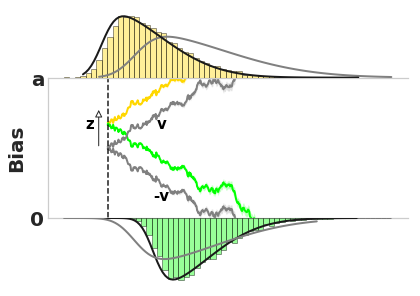

In [18]:
fig = plt.figure(1, figsize=(4, 3))

(rect_drift,rect_histupper,rect_histlower) = create_spaces()

axDrift = plt.axes(rect_drift)
axHistupper = plt.axes(rect_histupper)
axHistlower = plt.axes(rect_histlower)


shift_val = 0.15
axDrift.plot(t, X+shift_val, lw=2, color='gold')
axDrift.plot(t, negX+shift_val, lw=2,color='lime')
axDrift.plot(t, X, lw=2, color='grey')
axDrift.plot(t, negX, lw=2,color='grey')


x_lower = X+shift_val - lower_bound 
x_upper = X+shift_val+ lower_bound 

axDrift.fill_between(t, x_lower, x_upper, facecolor='gold', alpha=0.25)
axDrift.fill_between(t, x_lower-shift_val, x_upper-shift_val, facecolor='grey', alpha=0.25)

x_lower = negX+shift_val - lower_bound 
x_upper = negX+shift_val + lower_bound 

axDrift.fill_between(t, x_lower, x_upper, facecolor='lime', alpha=0.25)
axDrift.fill_between(t, x_lower-shift_val, x_upper-shift_val, facecolor='grey', alpha=0.25)

#format axes..
format_axes(axDrift = axDrift, axHistupper = axHistupper, axHistlower = axHistlower)  
format_driftaxes(axDrift = axDrift, x_upper = x_upper, x_lower = x_lower)

a = 5
loc = -0.25
scale = 0.75
x_plt = np.linspace(skewnorm.ppf(0.0001, a),skewnorm.ppf(0.95, a), 100)
rv = skewnorm(a,loc,scale)

axHistupper.plot(x_plt,rv.pdf(x_plt), 'grey', linewidth=2)


(r,a) =  create_histdata('bias_shifted')
x = r
a = 5
loc = -0.25
scale = 0.5
x_plt = np.linspace(skewnorm.ppf(0.001, a),skewnorm.ppf(0.95, a), 100)
rv = skewnorm(a,loc,scale)

# For upper histogram..
n, bins, patches = axHistupper.hist(x, 50, density=1, histtype='bar',ec='black')
pylab.setp(patches, 'facecolor', 'gold', 'alpha', 0.4)
# add a line showing the expected distribution
axHistupper.plot(x_plt-shift_val*1.9,rv.pdf(x_plt), 'k', linewidth=2)

(r,a) =  create_histdata('bias_shifted')
x = r
a = 5
loc = 0.05
scale = 0.5
x_plt = np.linspace(skewnorm.ppf(0.001, a),skewnorm.ppf(0.95, a), 100)
rv = skewnorm(a,loc,scale)

# For lower histogram..
n, bins, patches = axHistlower.hist(x+0.95, 50, density=1, histtype='bar',ec='black')
pylab.setp(patches, 'facecolor', 'lime', 'alpha', 0.4)
axHistlower.plot(x_plt+shift_val*2.5,rv.pdf(x_plt), 'k', linewidth=2)

a = 5
loc = 0.25
scale = 0.75
x_plt = np.linspace(skewnorm.ppf(0.001, a),skewnorm.ppf(0.95, a), 100)
rv = skewnorm(a,loc,scale)

axHistlower.plot(x_plt,rv.pdf(x_plt), 'grey', linewidth=2)
axHistlower.invert_yaxis()

y_ticks=axDrift.get_yticks().tolist()
y_ticks[0] = '0'
y_ticks[1] = ''
y_ticks[2] = 'a'
axDrift.set_yticklabels(y_ticks)

axHistupper.set_frame_on(False)
axHistlower.set_frame_on(False)
axDrift.spines['top'].set_visible(True)
axDrift.spines['right'].set_visible(False)
axDrift.spines['bottom'].set_visible(True)
axDrift.spines['left'].set_visible(True)

# Add some annotations now..
ann = axDrift.annotate("",xy=(-15, 0), xycoords='data',xytext=(-15, 0.25), textcoords='data',
                  va="center", ha="center",
                  arrowprops=dict(arrowstyle='<|-',connectionstyle="arc3,rad=-0.0",color="0.15",fc="w"))
axDrift.text(-30, 0.10, "z", rotation=0, ha='center',va='bottom', color='black')

axDrift.text(90, 0.10, "v", rotation=0, ha='center',va='bottom', color='black')
axDrift.text(90, -0.35, "-v", rotation=0, ha='center',va='bottom', color='black')

plt.savefig(fig_dir + "driftdiffusion_z_shift" + ".png", format='png', dpi=240, bbox_inches = 'tight',
            transparent=False)

# Drift diffusion with shift in 'v'

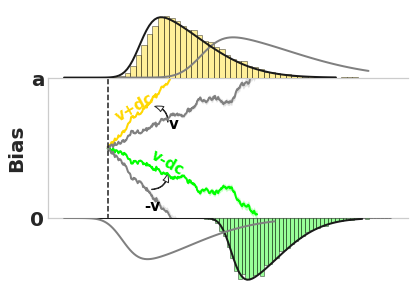

In [19]:
fig = plt.figure(1, figsize=(4, 3))

(rect_drift,rect_histupper,rect_histlower) = create_spaces()

axDrift = plt.axes(rect_drift)
axHistupper = plt.axes(rect_histupper)
axHistlower = plt.axes(rect_histlower)


shift_val = 0.15
slope1_val = 50
slope2_val = 600
axDrift.plot(t, X+t/slope1_val*shift_val, lw=2, color='gold')
axDrift.plot(t, negX+t/slope2_val*shift_val, lw=2,color='lime')
axDrift.plot(t, X, lw=2, color='grey')
axDrift.plot(t, negX-t/slope1_val*shift_val, lw=2,color='grey')

x_lower = X+t/slope1_val*shift_val - lower_bound 
x_upper = X+t/slope1_val*shift_val + lower_bound 

axDrift.fill_between(t, x_lower, x_upper, facecolor='gold', alpha=0.25)
axDrift.fill_between(t, x_lower-t/slope1_val*shift_val, x_upper-t/slope1_val*shift_val, 
                     facecolor='grey', alpha=0.25)

x_lower =  negX+t/slope2_val*shift_val- lower_bound 
x_upper =  negX+t/slope2_val*shift_val+ lower_bound 

axDrift.fill_between(t, x_lower, x_upper, facecolor='lime', alpha=0.25)
axDrift.fill_between(t, x_lower-t/slope1_val*shift_val, x_upper-t/slope1_val*shift_val, 
                     facecolor='grey', alpha=0.25)

#format axes..
format_axes(axDrift = axDrift, axHistupper = axHistupper, axHistlower = axHistlower) 

format_driftaxes(axDrift = axDrift, x_upper = x_upper-t/slope2_val*shift_val, 
                 x_lower = x_lower-t/slope2_val*shift_val)

a = 5
loc = 0.5
scale = 0.75
x_plt = np.linspace(skewnorm.ppf(0.01, a),skewnorm.ppf(0.95, a), 100)
rv = skewnorm(a,loc,scale)

axHistupper.plot(x_plt,rv.pdf(x_plt), 'grey', linewidth=2)

(r,a) =  create_histdata('bias_shifted')
x = r
a = 5
loc = 0.25
scale = 0.5
x_plt = np.linspace(skewnorm.ppf(0.001, a),skewnorm.ppf(0.95, a), 100)
rv = skewnorm(a,loc,scale)

# For upper histogram..
n, bins, patches = axHistupper.hist(x+0.5, 50, density=1, histtype='bar',ec='black')
pylab.setp(patches, 'facecolor', 'gold', 'alpha', 0.4)
# add a line showing the expected distribution
axHistupper.plot(x_plt-shift_val*1.9,rv.pdf(x_plt), 'k', linewidth=2)

(r,a) =  create_histdata('bias_shifted')
x = r
a = 5
loc = 1.1
scale = 0.5
x_plt = np.linspace(skewnorm.ppf(0.001, a),skewnorm.ppf(0.99, a), 100)
rv = skewnorm(a,loc,scale)

# For lower histogram..
n, bins, patches = axHistlower.hist(x+1.95, 50, density=1, histtype='bar',ec='black')
pylab.setp(patches, 'facecolor', 'lime', 'alpha', 0.4)
axHistlower.plot(x_plt+shift_val*2.5,rv.pdf(x_plt), 'k', linewidth=2)

a = 5
loc = 0.25
scale = 0.75
x_plt = np.linspace(skewnorm.ppf(0.001, a),skewnorm.ppf(0.95, a), 100)
rv = skewnorm(a,loc,scale)

axHistlower.plot(x_plt,rv.pdf(x_plt), 'grey', linewidth=2)
axHistlower.invert_yaxis()

y_ticks=axDrift.get_yticks().tolist()
y_ticks[0] = '0'
y_ticks[1] = ''
y_ticks[2] = 'a'
axDrift.set_yticklabels(y_ticks)

axHistupper.set_frame_on(False)
axHistlower.set_frame_on(False)
axDrift.spines['top'].set_visible(True)
axDrift.spines['right'].set_visible(False)
axDrift.spines['bottom'].set_visible(True)
axDrift.spines['left'].set_visible(True)

import matplotlib.patches as patches

style="Simple,tail_width=0.5,head_width=6,head_length=8"
kw = dict(arrowstyle=style, color="0.15",fc="w")
a1 = patches.FancyArrowPatch((100,0.2), (75,0.35),connectionstyle="arc3,rad=.5", **kw)
a2 = patches.FancyArrowPatch((70,-0.35),(100,-0.2),connectionstyle="arc3,rad=.5", **kw)

for a in [a1,a2]:
    axDrift.add_patch(a)

axDrift.text(110, 0.14, "v", rotation=0, ha='center',va='bottom', color='black')
axDrift.text(45, 0.20, "v+dc", rotation=30, ha='center',va='bottom', color='gold')
axDrift.text(75, -0.55, "-v", rotation=0, ha='center',va='bottom', color='black')
axDrift.text(100, -0.25, "v-dc", rotation=-30, ha='center',va='bottom', color='lime')

plt.savefig(fig_dir + "driftdiffusion_v_dc_shift" + ".png", format='png', dpi=240, bbox_inches = 'tight',
            transparent=False)